# Assignment - Advanced Regression

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.
* Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

Below are the steps followed to solve the problem statement:   
1. Load the Data
2. Data pre-processing  
3. Exploratory Data Analysis (EDA)
4. Model bulding   
    * RFE & VIF
    * Regularized models
    * Residual Analysis
5. Conclusion

### 1. Load the Data

In [2]:
# Load the data
train_data=pd.read_csv('train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Check the shape
print("Rows    : ", train_data.shape[0])
print("Columns : ", train_data.shape[1])

Rows    :  1460
Columns :  81


In [4]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# drop
train_data.drop(['Id'],axis=1,inplace=True)
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Check for null values
def null_checker(df):
    """Method checks for nulls in a given data frame"""
    columns=[]
    nulls=[]
    for col in df.columns:
        if df[col].isna().sum()>0:
            columns.append(col)
            nulls.append(df[col].isna().sum())
    missing_val_df=pd.DataFrame({'Feature':columns,'Nulls':nulls})
    missing_val_df.sort_values(by='Nulls',ascending=False,inplace=True)
    missing_val_df['Null_pct']=round((missing_val_df['Nulls']/len(df))*100,2)
    return missing_val_df

missing_val_df=null_checker(train_data)
missing_val_df.reset_index(drop=True,inplace=True)
missing_val_df


,Feature,Nulls,Null_pct
0,PoolQC,1453,99.52
1,MiscFeature,1406,96.30
2,Alley,1369,93.77
3,Fence,1179,80.75
4,FireplaceQu,690,47.26
5,LotFrontage,259,17.74
6,GarageType,81,5.55
7,GarageYrBlt,81,5.55
8,GarageFinish,81,5.55
9,GarageQual,81,5.55


### 2. Data Preprocessing

In [7]:
# Null value imputation
train_data.fillna({'LotFrontage':train_data['LotFrontage'].median(),
                   'MasVnrArea':train_data['MasVnrArea'].median(),
                   'MasVnrType':train_data['MasVnrArea'].mode()[0],
                   'Electrical':train_data['Electrical'].mode()[0],
                   'Alley':'NA',  'BsmtQual':'NA', 'BsmtCond':'NA', 
                   'BsmtExposure':'NA', 'BsmtFinType1':'NA', 'BsmtFinType2':'NA', 
                   'FireplaceQu':'NA', 'GarageType':'NA', 'GarageFinish':'NA', 
                   'GarageQual':'NA', 'GarageCond':'NA', 'PoolQC':'NA', 'Fence':'NA', 
                   'MiscFeature':'NA'}, inplace=True)

# fill the GarageYrBlt with YearBuilt
train_data['GarageYrBlt']=train_data['GarageYrBlt'].fillna(train_data['YearBuilt'])

In [8]:
# Re-check for nulls in train
missing_val_df=null_checker(train_data)
if len(missing_val_df)==0: print("No Nulls found in train data")

No Nulls found in train data


In [9]:
# Check the distribution of classes in categorical features
for col in train_data.columns:
    if train_data[col].dtype == np.object :
        print(col)
        print(train_data[col].value_counts(normalize=True))
        print("-"*50)

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
--------------------------------------------------
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
--------------------------------------------------
Alley
NA      0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64
--------------------------------------------------
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
--------------------------------------------------
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
--------------------------------------------------
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
--------------------------------------------------
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.0027

In [10]:
# Drop the feature with more than 80% bias data
train_data=train_data.drop(columns=['Street', 'LandContour', 'Utilities', 
                                    'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 
                                    'GarageQual', 'GarageCond', 'PavedDrive', 'Condition1', 
                                    'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType',
                                    'SaleCondition'])

In [11]:
 # converting the datatype to category - makes more sense to convert to cat
train_data['MSSubClass']=train_data['MSSubClass'].astype('category')
train_data['OverallQual']=train_data['OverallQual'].astype('category')
train_data['OverallCond']=train_data['OverallCond'].astype('category')


# features with years
years=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt','YrSold']
train_data[years]=train_data[years].astype(int)

# Converting the years to useful features
train_data['PropertyAge']=train_data['YrSold']-train_data['YearBuilt']
train_data['Renovated']=train_data['YrSold']-train_data['YearRemodAdd']
train_data['GarageAge']=train_data['YrSold']-train_data['GarageYrBlt']


# creating bins from numerical features
bins=[0,10,20,30,40,50,60,70,80,90,100]
label=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
train_data['GarageAge']=pd.cut(train_data['GarageAge'],bins,labels=label)
train_data['GarageAge']=train_data['GarageAge'].astype('object')

# replace month values with month names
train_data['MoSold'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                             ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
                             ,inplace=True) 

# drop the years
train_data.drop(years, axis=1,inplace=True)

In [12]:
# final data shape
train_data.shape

(1460, 59)

In [13]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SalePrice,PropertyAge,Renovated,GarageAge
0,60,RL,65.0,8450,NA,Reg,Inside,CollgCr,2Story,7,...,0,NA,NA,NA,0,Feb,208500,5,5,0-10
1,20,RL,80.0,9600,NA,Reg,FR2,Veenker,1Story,6,...,0,NA,NA,NA,0,May,181500,31,31,30-40
2,60,RL,68.0,11250,NA,IR1,Inside,CollgCr,2Story,7,...,0,NA,NA,NA,0,Sep,223500,7,6,0-10
3,70,RL,60.0,9550,NA,IR1,Corner,Crawfor,2Story,7,...,0,NA,NA,NA,0,Feb,140000,91,36,0-10
4,60,RL,84.0,14260,NA,IR1,FR2,NoRidge,2Story,8,...,0,NA,NA,NA,0,Dec,250000,8,8,0-10


### 3. Exploratory Data Analysis

In [14]:
# identifying all numerical features
num_features=list(train_data.select_dtypes(include=np.number).columns)


# identifying all categorical features
cat_features=list(train_data.select_dtypes(['object']).columns)

print(cat_features)

['MSZoning', 'Alley', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'GarageAge']


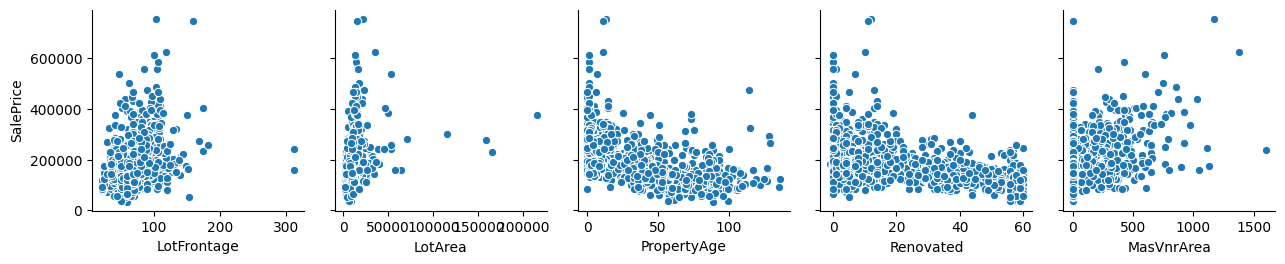

In [15]:
sns.pairplot(x_vars=['LotFrontage', 'LotArea', 'PropertyAge', 'Renovated', 'MasVnrArea'],
             y_vars='SalePrice',
             data=train_data[num_features])
plt.show()

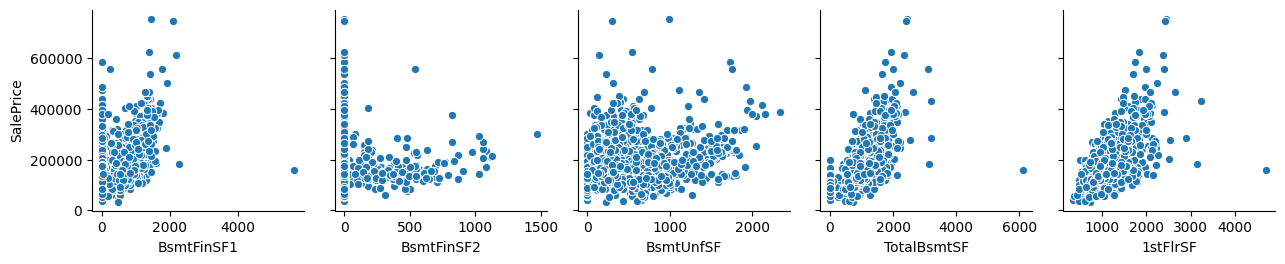

In [16]:
sns.pairplot(x_vars=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF'],
             y_vars='SalePrice',
             data=train_data[num_features])
plt.show()

In [17]:
# Merge features which can be represented as single feature
train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']
train_data.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1,inplace=True)

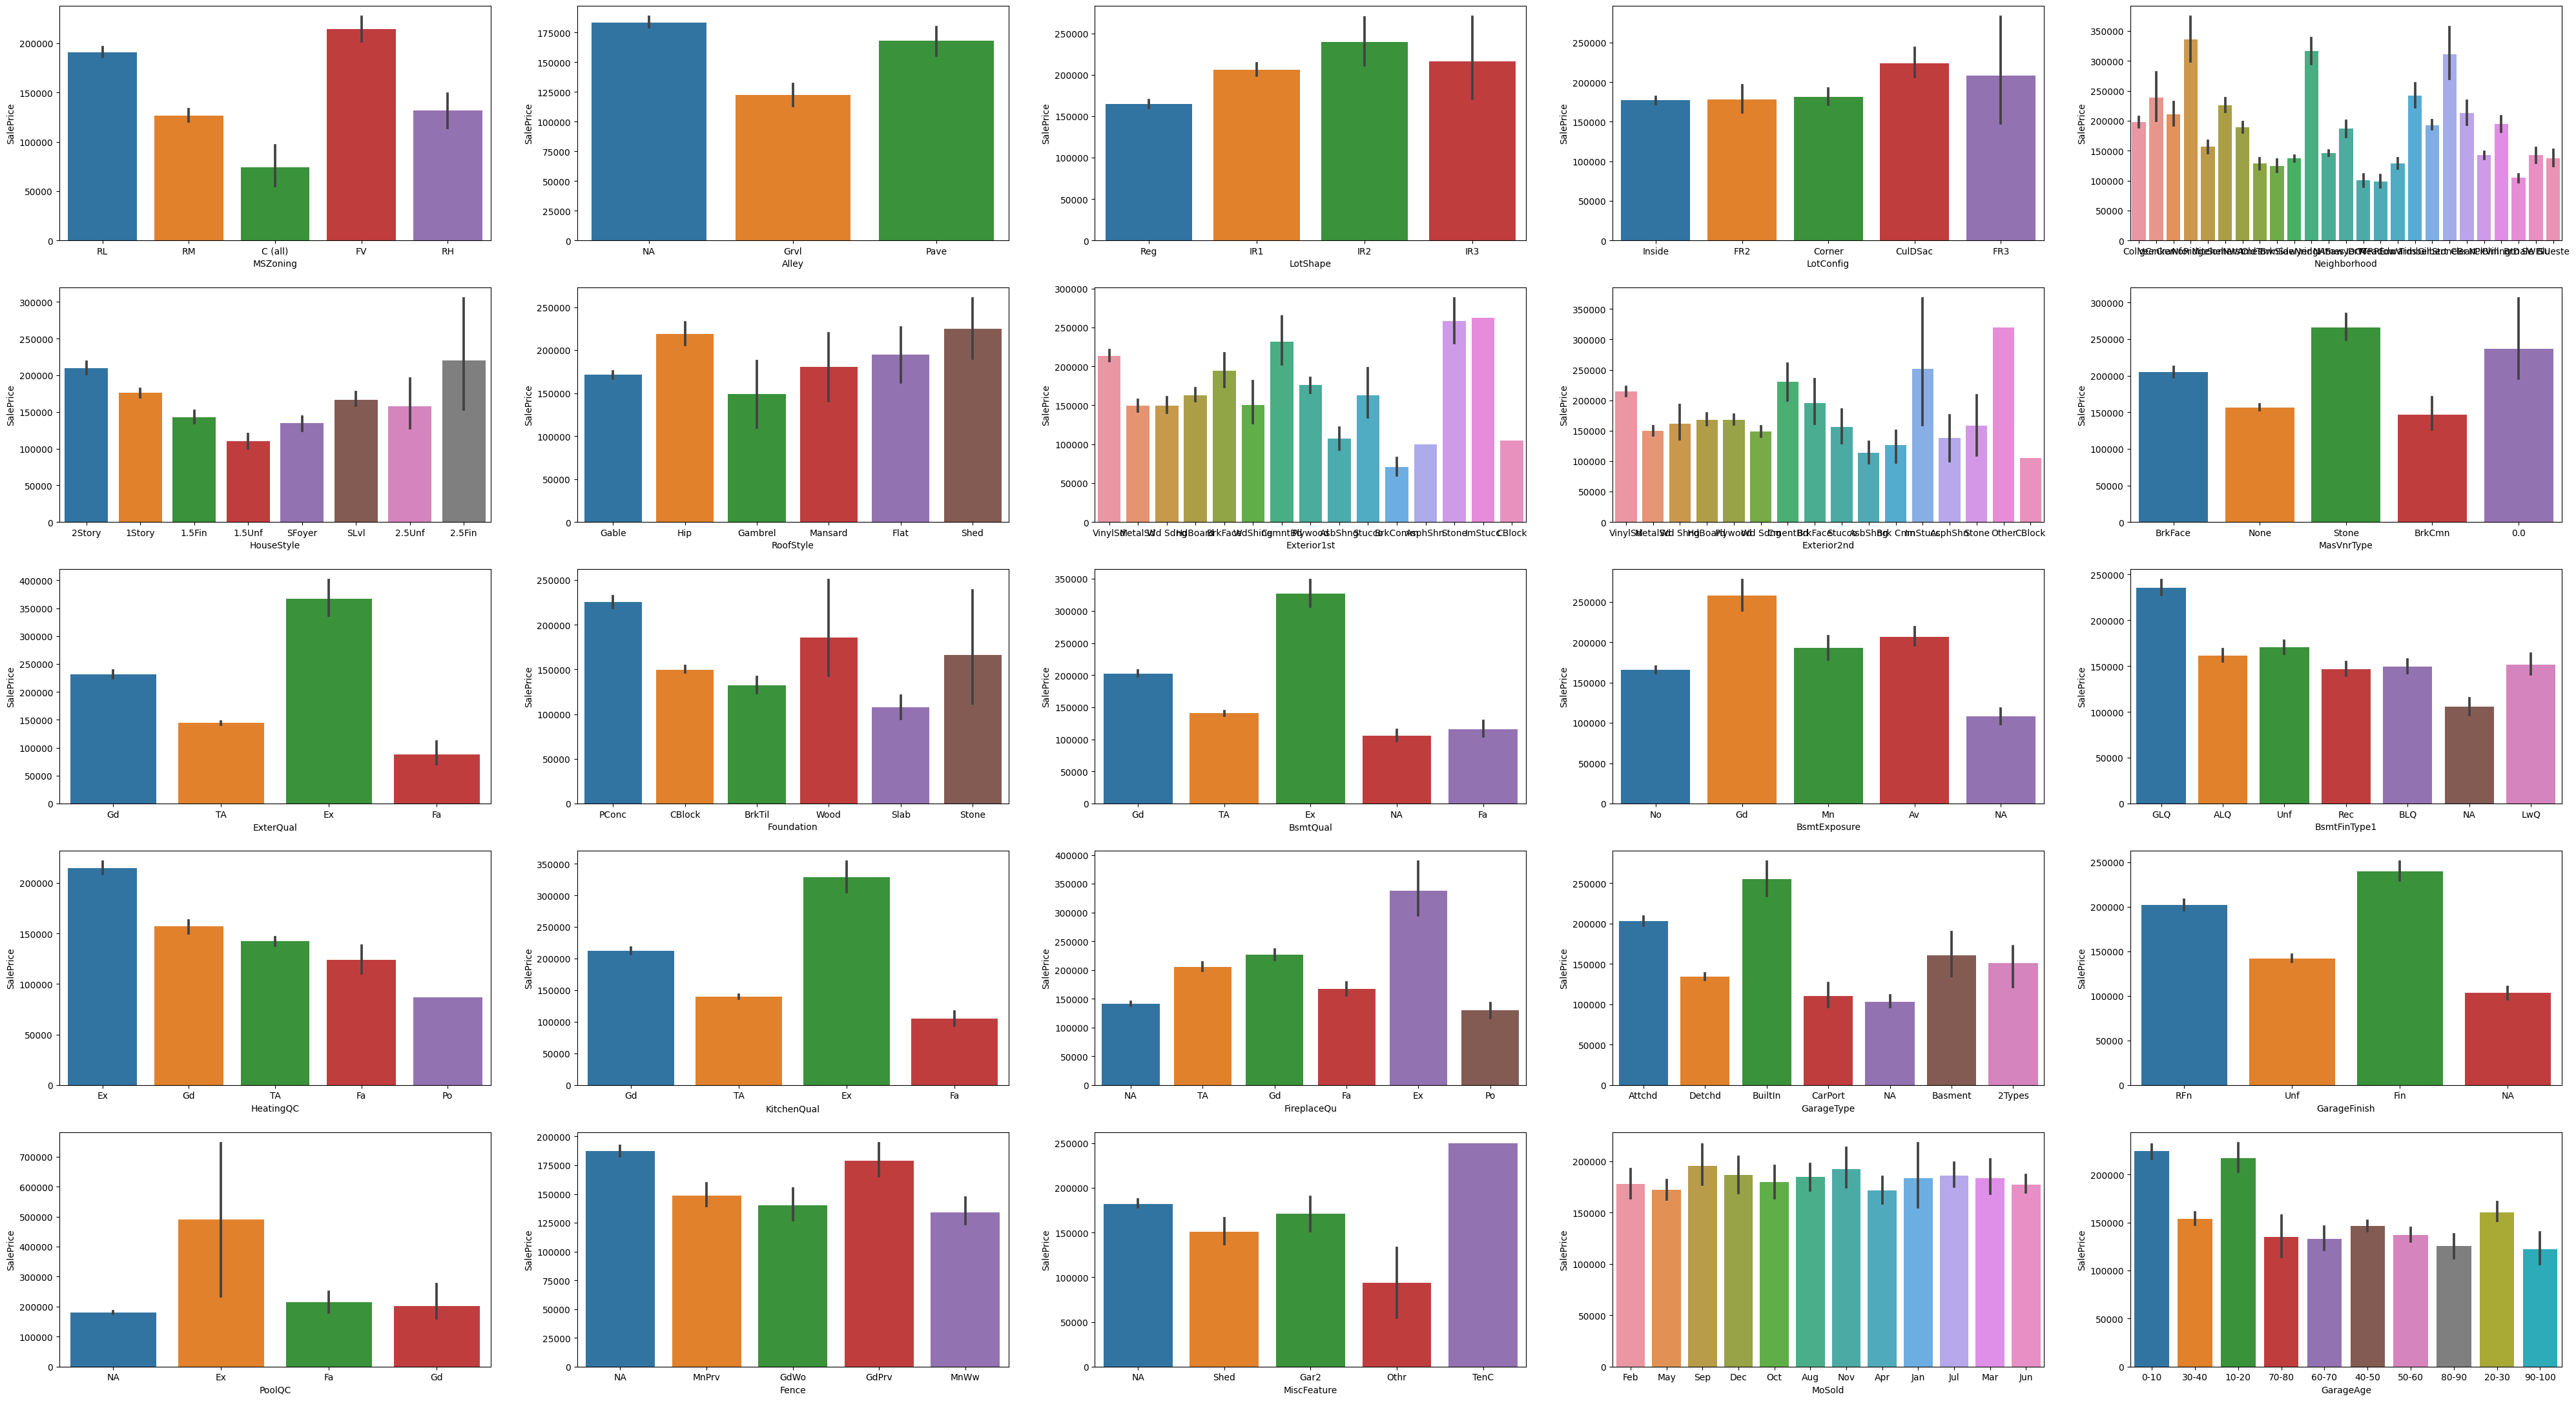

In [18]:
# Distribution of various categorical columns
plt.figure(figsize=(50,50))
j=1
for i in train_data[cat_features].columns:
    plt.subplot(9,5,j)
    sns.barplot(train_data[i],train_data['SalePrice'])
    j+=1

In [19]:
# encoding of categorical features
cat_features.extend(['MSSubClass'])
df=pd.get_dummies(train_data[cat_features],drop_first=True)
train_data.drop(cat_features,axis=1, inplace=True)
# remove merged features from the feature list
num_features.remove('TotalBsmtSF')
num_features.remove('1stFlrSF')
num_features.remove('2ndFlrSF')

In [20]:
for col in train_data.columns:
    df[col]=train_data[col]
saleprice=df.pop('SalePrice')

df['SalePrice']=saleprice
df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,PropertyAge,Renovated,TotalSF,SalePrice
0,0,0,1,0,1,0,0,0,1,0,...,61,0,0,0,0,0,5,5,2566,208500
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,31,31,2524,181500
2,0,0,1,0,1,0,0,0,0,0,...,42,0,0,0,0,0,7,6,2706,223500
3,0,0,1,0,1,0,0,0,0,0,...,35,272,0,0,0,0,91,36,2473,140000
4,0,0,1,0,1,0,0,0,0,0,...,84,0,0,0,0,0,8,8,3343,250000


### 4. Model bulding

In [21]:
# train test split
df_train,df_test=train_test_split(df,train_size=0.7, random_state=100)
print(f"Train shape: {df_train.shape}")
print(f"Test shape : {df_test.shape}")

Train shape: (1021, 201)
Test shape : (439, 201)


In [22]:
# scaling the numeric features
scaler=MinMaxScaler()

scaler.fit(df_train[num_features])
df_train[num_features]=scaler.transform(df_train[num_features])
df_test[num_features]=scaler.transform(df_test[num_features])

# check if properly scaled 
df_train[num_features].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropertyAge,Renovated
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.166332,0.042162,0.065306,0.079406,0.033980,0.241329,0.011649,0.207562,0.146588,0.029873,...,0.108100,0.089934,0.042105,0.007756,0.037559,0.003318,0.003143,0.202346,0.268364,0.390729
std,0.075653,0.048221,0.117088,0.082409,0.115907,0.192097,0.093608,0.102200,0.175127,0.120615,...,0.145250,0.126569,0.114434,0.063649,0.136582,0.053278,0.037314,0.109845,0.223133,0.337590
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.027937,0.000000,0.000000,0.000000,0.092466,0.000000,0.133935,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.131371,0.058824,0.081967
50%,0.164384,0.037555,0.000000,0.069454,0.000000,0.197774,0.000000,0.197540,0.000000,0.000000,...,0.000000,0.049713,0.000000,0.000000,0.000000,0.000000,0.000000,0.175115,0.250000,0.245902
75%,0.195205,0.046943,0.098750,0.126152,0.000000,0.345034,0.000000,0.256726,0.333333,0.000000,...,0.196033,0.133843,0.000000,0.000000,0.000000,0.000000,0.000000,0.250104,0.397059,0.688525
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Recursive Feature Elimination

In [23]:
# splitting the dependent and independent features
X_train=df_train.iloc[:,:-1]
y_train=df_train['SalePrice']

X_test=df_test.iloc[:,:-1]
y_test=df_test['SalePrice']

In [24]:
X_train.shape

(1021, 200)

In [25]:
# RFE to identify top 50 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=50)       
rfe = rfe.fit(X_train, y_train)

# list of top 50
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSZoning_FV', False, 47),
 ('MSZoning_RH', False, 27),
 ('MSZoning_RL', False, 39),
 ('MSZoning_RM', False, 48),
 ('Alley_NA', False, 148),
 ('Alley_Pave', False, 82),
 ('LotShape_IR2', False, 119),
 ('LotShape_IR3', False, 36),
 ('LotShape_Reg', False, 111),
 ('LotConfig_CulDSac', False, 59),
 ('LotConfig_FR2', False, 33),
 ('LotConfig_FR3', False, 45),
 ('LotConfig_Inside', False, 114),
 ('Neighborhood_Blueste', True, 1),
 ('Neighborhood_BrDale', False, 138),
 ('Neighborhood_BrkSide', False, 131),
 ('Neighborhood_ClearCr', False, 136),
 ('Neighborhood_CollgCr', False, 133),
 ('Neighborhood_Crawfor', True, 1),
 ('Neighborhood_Edwards', False, 13),
 ('Neighborhood_Gilbert', False, 139),
 ('Neighborhood_IDOTRR', False, 102),
 ('Neighborhood_MeadowV', False, 69),
 ('Neighborhood_Mitchel', False, 44),
 ('Neighborhood_NAmes', False, 38),
 ('Neighborhood_NPkVill', True, 1),
 ('Neighborhood_NWAmes', False, 86),
 ('Neighborhood_NoRidge', True, 1),
 ('Neighborhood_NridgHt', True, 1),
 ('Nei

In [26]:
# Top 50 features supported by RFE
columns_rfe = X_train.columns[rfe.support_]
print("Columns supported by RFE: ")
print("-"*20)
for col in columns_rfe:
    print(col)

Columns supported by RFE: 
--------------------
Neighborhood_Blueste
Neighborhood_Crawfor
Neighborhood_NPkVill
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_Somerst
Neighborhood_StoneBr
Neighborhood_Veenker
HouseStyle_2.5Fin
HouseStyle_2.5Unf
Exterior1st_BrkComm
Exterior1st_BrkFace
Exterior1st_CemntBd
Exterior2nd_CmentBd
MasVnrType_BrkCmn
ExterQual_Gd
ExterQual_TA
Foundation_Stone
BsmtQual_Fa
BsmtQual_Gd
BsmtQual_TA
BsmtExposure_Gd
BsmtExposure_NA
KitchenQual_Fa
KitchenQual_Gd
KitchenQual_TA
GarageType_Basment
GarageType_CarPort
PoolQC_Fa
PoolQC_Gd
PoolQC_NA
MoSold_Oct
MSSubClass_75
MSSubClass_90
MSSubClass_120
MSSubClass_160
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
LowQualFinSF
GrLivArea
KitchenAbvGr
Fireplaces
GarageArea
WoodDeckSF
3SsnPorch
PoolArea
PropertyAge


In [27]:
# compute vif
def compute_vif(X):
    """Method take a dataframe and computed the VIF for its features"""
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

# fit a regression stats model 
def build_model(X_):
    """Method takes a dataframe and prints the fitted model summary"""
    # Adding a constant variable 
    X_train_lm = sm.add_constant(X_)
    lm = sm.OLS(y_train,X_train_lm).fit()   
    print(lm.summary())
    return

#### Model 1 : Dropping the variable and updating the model

In [28]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe=X_train[columns_rfe]
build_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     164.6
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:33:40   Log-Likelihood:                 1955.3
No. Observations:                1021   AIC:                            -3809.
Df Residuals:                     970   BIC:                            -3557.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.5794 

<span style="color:Green">**Features with p-value > 0.05 are not signficant to the model. Hence dropping them**</span>

#### Model 2 : Dropping the variable and updating the model

In [29]:
drop_feat=['Neighborhood_Blueste',
'HouseStyle_2.5Fin',
'HouseStyle_2.5Unf',
'Exterior1st_CemntBd',
'Exterior2nd_CmentBd',
'MasVnrType_BrkCmn',
'Foundation_Stone',
'GarageType_CarPort',
'MSSubClass_90',
'3SsnPorch',
'PoolArea']

In [30]:
X_train_rfe = X_train_rfe.drop(drop_feat, axis = 1)
build_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     198.4
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:33:40   Log-Likelihood:                 1922.0
No. Observations:                1021   AIC:                            -3764.
Df Residuals:                     981   BIC:                            -3567.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3333 

<span style="color:Green">**Features with p-value > 0.05 are not signficant to the model. Hence dropping them**</span>

#### Model 3 : Dropping the variable and updating the model

In [31]:
drop_feat=['Neighborhood_NPkVill','MSSubClass_75']

In [32]:
X_train_rfe = X_train_rfe.drop(drop_feat, axis = 1)
build_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     208.6
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:33:40   Log-Likelihood:                 1919.9
No. Observations:                1021   AIC:                            -3764.
Df Residuals:                     983   BIC:                            -3577.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3343 

<span style="color:Green">**All features have p-value < 0.05.Checking for VIF value**</span>

In [33]:
# Calculate the VIFs for the new model
vif=compute_vif(X_train_rfe)
vif_df=pd.DataFrame(vif)
vif_df[vif_df['VIF']>5]

,Features,VIF
21,PoolQC_NA,75.79
9,ExterQual_TA,27.09
17,KitchenQual_TA,17.22
12,BsmtQual_TA,14.09
8,ExterQual_Gd,13.30
31,GrLivArea,12.25
16,KitchenQual_Gd,11.57
34,GarageArea,11.21
11,BsmtQual_Gd,9.41
36,PropertyAge,8.00


<span style="color:Green">**Features with very high VIF value are not signficant to the model. Hence dropping them**</span>

#### Model 4 : Dropping the variable and updating the model

In [34]:
# features with very high vif
drop_feat=list(vif_df[vif_df['VIF']>5]['Features'])
drop_feat

['PoolQC_NA',
 'ExterQual_TA',
 'KitchenQual_TA',
 'BsmtQual_TA',
 'ExterQual_Gd',
 'GrLivArea',
 'KitchenQual_Gd',
 'GarageArea',
 'BsmtQual_Gd',
 'PropertyAge',
 'BsmtUnfSF',
 'BsmtFinSF1']

In [35]:
X_train_rfe = X_train_rfe.drop(drop_feat, axis = 1)
build_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     71.62
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          2.07e-202
Time:                        22:33:41   Log-Likelihood:                 1332.4
No. Observations:                1021   AIC:                            -2613.
Df Residuals:                     995   BIC:                            -2485.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1296 

<span style="color:Green">**Features with p-value > 0.05 are not signficant to the model. Hence dropping them**</span>

#### Model 5 : Dropping the variable and updating the model

In [36]:
drop_feat=['Neighborhood_Veenker',
'Exterior1st_BrkComm', 
'PoolQC_Fa',    
'MoSold_Oct',   
'BsmtFinSF2',  
'LowQualFinSF', 
'KitchenAbvGr' ]

In [37]:
X_train_rfe = X_train_rfe.drop(drop_feat, axis = 1)
build_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     98.38
Date:                Wed, 22 Feb 2023   Prob (F-statistic):          1.00e-206
Time:                        22:33:41   Log-Likelihood:                 1326.5
No. Observations:                1021   AIC:                            -2615.
Df Residuals:                    1002   BIC:                            -2521.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1271 

<span style="color:Green">**All features have p-value < 0.05.Checking for VIF value**</span>

In [38]:
# Calculate the VIFs for the new model
vif=compute_vif(X_train_rfe)
vif_df=pd.DataFrame(vif)
vif_df

,Features,VIF
16,Fireplaces,2.22
14,LotArea,1.87
15,MasVnrArea,1.74
17,WoodDeckSF,1.67
2,Neighborhood_NridgHt,1.30
7,BsmtExposure_Gd,1.29
12,MSSubClass_120,1.23
1,Neighborhood_NoRidge,1.21
3,Neighborhood_Somerst,1.19
13,MSSubClass_160,1.17


In [39]:
# final features
X_train_rfe.columns

Index(['Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Exterior1st_BrkFace',
       'BsmtQual_Fa', 'BsmtExposure_Gd', 'BsmtExposure_NA', 'KitchenQual_Fa',
       'GarageType_Basment', 'PoolQC_Gd', 'MSSubClass_120', 'MSSubClass_160',
       'LotArea', 'MasVnrArea', 'Fireplaces', 'WoodDeckSF'],
      dtype='object')

In [40]:
X_test[X_train_rfe.columns].shape

(439, 18)

In [41]:
X_train_rfe.shape

(1021, 18)

### Linear Regression (without regularisation)

In [42]:
# regression model
lm = LinearRegression().fit(X_train_rfe, y_train)

y_train_pred_lm=lm.predict(X_train[X_train_rfe.columns])
y_test_pred_lm=lm.predict(X_test[X_train_rfe.columns])

# get r squared
r2=r2_score(y_true=y_train,y_pred=y_train_pred_lm) 
mse = mean_squared_error(y_train, y_train_pred_lm)
rmse = mse**0.5
print(f"LR | Train RMSE: {round(rmse,2)} | Train R2: {round(r2,2)}")

r2=r2_score(y_true=y_test,y_pred=y_test_pred_lm) 
mse = mean_squared_error(y_test, y_test_pred_lm)
rmse = mse**0.5
print(f"LR | Test RMSE: {round(rmse,2)}  | Test R2: {round(r2,2)}")

LR | Train RMSE: 0.07 | Train R2: 0.64
LR | Test RMSE: 0.07  | Test R2: 0.58


### Ridge Model

In [43]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Ridge regression
ridge = Ridge()
# cross validation
model_ridge= GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)

model_ridge.fit(X_train_rfe,y_train)
# best params
model_ridge.best_params_
alpha=model_ridge.best_params_['alpha']


# fit the best model
ridge=Ridge(alpha=alpha).fit(X_train_rfe,y_train) 

y_train_pred_ridge=ridge.predict(X_train[X_train_rfe.columns])
y_test_pred_ridge=ridge.predict(X_test[X_train_rfe.columns])

# get r squared & rmse
r2=r2_score(y_true=y_train,y_pred=y_train_pred_ridge) 
mse = mean_squared_error(y_train, y_train_pred_ridge)
rmse = mse**0.5
print(f"Ridge | Train RMSE: {round(rmse,2)} | Train R2: {round(r2,2)}")


r2=r2_score(y_true=y_test,y_pred=y_test_pred_ridge) 
mse = mean_squared_error(y_test, y_test_pred_ridge)
rmse = mse**0.5
print(f"Ridge | Test RMSE: {round(rmse,2)}  | Test R2: {round(r2,2)}")

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Ridge | Train RMSE: 0.07 | Train R2: 0.64
Ridge | Test RMSE: 0.07  | Test R2: 0.58


In [44]:
# print the features and coefficients
ridge_coef_df=pd.DataFrame({"feature":list(ridge.feature_names_in_),
                           "coeff":list(ridge.coef_)})
ridge_coef_df

,feature,coeff
0,Neighborhood_Crawfor,0.049946
1,Neighborhood_NoRidge,0.170092
2,Neighborhood_NridgHt,0.149527
3,Neighborhood_Somerst,0.111802
4,Neighborhood_StoneBr,0.141938
5,Exterior1st_BrkFace,0.030694
6,BsmtQual_Fa,-0.032142
7,BsmtExposure_Gd,0.056926
8,BsmtExposure_NA,-0.044976
9,KitchenQual_Fa,-0.043977


### Lasso Model

In [45]:
# Lasso Regression
lasso = Lasso()
# cross validation
model_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso.fit(X_train_rfe, y_train) 
alpha=model_lasso.best_params_['alpha']

# fit the best model
lasso=Lasso(alpha=alpha).fit(X_train_rfe,y_train) 

y_train_pred_lasso=lasso.predict(X_train[X_train_rfe.columns])
y_test_pred_lasso=lasso.predict(X_test[X_train_rfe.columns])

# get r squared
r2=r2_score(y_true=y_train,y_pred=y_train_pred_lasso) 
mse = mean_squared_error(y_train, y_train_pred_lasso)
rmse = mse**0.5
print(f"Lasso | Train RMSE: {round(rmse,2)} | Train R2: {round(r2,2)}")

r2=r2_score(y_true=y_test,y_pred=y_test_pred_lasso) 
mse = mean_squared_error(y_test, y_test_pred_lasso)
rmse = mse**0.5
print(f"Lasso | Test RMSE: {round(rmse,2)}  | Test R2: {round(r2,2)}")

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Lasso | Train RMSE: 0.07 | Train R2: 0.64
Lasso | Test RMSE: 0.07  | Test R2: 0.6


In [46]:
# print the features and coefficients
lasso_coef_df=pd.DataFrame({"feature":list(lasso.feature_names_in_),
                           "coeff":list(lasso.coef_)})
lasso_coef_df

,feature,coeff
0,Neighborhood_Crawfor,0.046032
1,Neighborhood_NoRidge,0.169548
2,Neighborhood_NridgHt,0.147946
3,Neighborhood_Somerst,0.109143
4,Neighborhood_StoneBr,0.132024
5,Exterior1st_BrkFace,0.027511
6,BsmtQual_Fa,-0.028690
7,BsmtExposure_Gd,0.057540
8,BsmtExposure_NA,-0.041694
9,KitchenQual_Fa,-0.041569


#### Residual Analysis

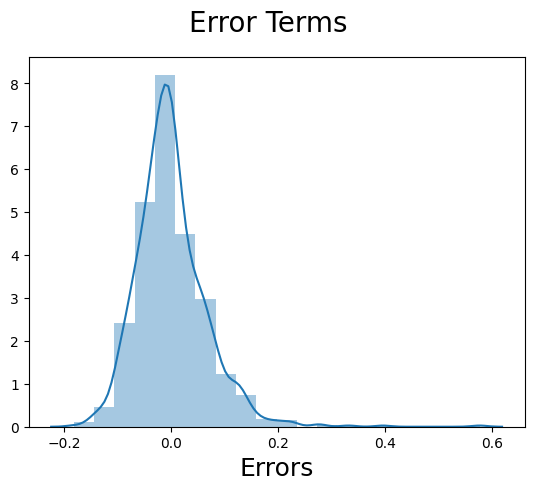

In [47]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred_lasso), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

### 5. Conclusion:

In [48]:
# Significant variables
print("Significant variables for predicting house price:")
print("-"*50)
for col in X_train_rfe.columns:
    print(col)

Significant variables for predicting house price:
--------------------------------------------------
Neighborhood_Crawfor
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_Somerst
Neighborhood_StoneBr
Exterior1st_BrkFace
BsmtQual_Fa
BsmtExposure_Gd
BsmtExposure_NA
KitchenQual_Fa
GarageType_Basment
PoolQC_Gd
MSSubClass_120
MSSubClass_160
LotArea
MasVnrArea
Fireplaces
WoodDeckSF


In [49]:
# Best value of alpha in Ridge Regression 
print(f"Best alpha for Ridge regression: {model_ridge.best_params_['alpha']} ")
# best value of alpha in Lasso Regression
print(f"Best alpha for Lasso regression: {model_lasso.best_params_['alpha']} ")

Best alpha for Ridge regression: 0.01 
Best alpha for Lasso regression: 0.0001 


<span style="color:Green">**The best regularized model is Lasso regression. Since it has a very less difference between train R squared and test R Squared.This model has a very less chance of overfitting**</span>

--------------------------------------------------------------------------------

## Work sheet for subjective question

### Question 1 - Double the values of alpha for rigde and lasso

In [50]:
# Question 1 - Double the values of alpha for rigde and lasso

# fit the best model
ridge=Ridge(alpha=0.1 * 2).fit(X_train_rfe,y_train) 

y_train_pred_ridge=ridge.predict(X_train[X_train_rfe.columns])
y_test_pred_ridge=ridge.predict(X_test[X_train_rfe.columns])

# get r squared & rmse
r2=r2_score(y_true=y_train,y_pred=y_train_pred_ridge) 
mse = mean_squared_error(y_train, y_train_pred_ridge)
rmse = mse**0.5
print(f"Ridge | Train RMSE: {round(rmse,2)} | Train R2: {round(r2,2)}")


r2=r2_score(y_true=y_test,y_pred=y_test_pred_ridge) 
mse = mean_squared_error(y_test, y_test_pred_ridge)
rmse = mse**0.5
print(f"Ridge | Test RMSE: {round(rmse,2)}  | Test R2: {round(r2,2)}")

Ridge | Train RMSE: 0.07 | Train R2: 0.64
Ridge | Test RMSE: 0.07  | Test R2: 0.59


In [51]:
# print the features and coefficients
ridge_coef_df=pd.DataFrame({"feature":list(ridge.feature_names_in_),
                           "coeff":list(ridge.coef_)})
ridge_coef_df

,feature,coeff
0,Neighborhood_Crawfor,0.049647
1,Neighborhood_NoRidge,0.169893
2,Neighborhood_NridgHt,0.149359
3,Neighborhood_Somerst,0.111335
4,Neighborhood_StoneBr,0.139700
5,Exterior1st_BrkFace,0.031001
6,BsmtQual_Fa,-0.032189
7,BsmtExposure_Gd,0.057358
8,BsmtExposure_NA,-0.044898
9,KitchenQual_Fa,-0.043936


In [52]:
# Question 1 - Double the values of alpha for rigde and lasso

# fit the best model
lasso=Lasso(alpha=0.0001 * 2).fit(X_train_rfe,y_train) 

y_train_pred_lasso=lasso.predict(X_train[X_train_rfe.columns])
y_test_pred_lasso=lasso.predict(X_test[X_train_rfe.columns])

# get r squared
r2=r2_score(y_true=y_train,y_pred=y_train_pred_lasso) 
mse = mean_squared_error(y_train, y_train_pred_lasso)
rmse = mse**0.5
print(f"Lasso | Train RMSE: {round(rmse,2)} | Train R2: {round(r2,2)}")

r2=r2_score(y_true=y_test,y_pred=y_test_pred_lasso) 
mse = mean_squared_error(y_test, y_test_pred_lasso)
rmse = mse**0.5
print(f"Lasso | Test RMSE: {round(rmse,2)}  | Test R2: {round(r2,2)}")

Lasso | Train RMSE: 0.07 | Train R2: 0.63
Lasso | Test RMSE: 0.07  | Test R2: 0.6


In [53]:
# print the features and coefficients
lasso_coef_df=pd.DataFrame({"feature":list(lasso.feature_names_in_),
                           "coeff":list(lasso.coef_)})
lasso_coef_df

,feature,coeff
0,Neighborhood_Crawfor,0.042103
1,Neighborhood_NoRidge,0.169000
2,Neighborhood_NridgHt,0.146360
3,Neighborhood_Somerst,0.106459
4,Neighborhood_StoneBr,0.121992
5,Exterior1st_BrkFace,0.024351
6,BsmtQual_Fa,-0.025241
7,BsmtExposure_Gd,0.058179
8,BsmtExposure_NA,-0.038409
9,KitchenQual_Fa,-0.039159


In [54]:
lasso_coef_df.sort_values(by=['coeff'], ascending=False)

,feature,coeff
1,Neighborhood_NoRidge,0.169000
2,Neighborhood_NridgHt,0.146360
15,MasVnrArea,0.141292
16,Fireplaces,0.123949
4,Neighborhood_StoneBr,0.121992
3,Neighborhood_Somerst,0.106459
17,WoodDeckSF,0.094380
14,LotArea,0.090957
7,BsmtExposure_Gd,0.058179
0,Neighborhood_Crawfor,0.042103


In [55]:
# Question 3 - drop the 5 important features

In [56]:

drop_feat=['Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'MasVnrArea', 'Fireplaces',
       'Neighborhood_StoneBr']

In [57]:
X_train_rfe = X_train_rfe.drop(drop_feat, axis = 1)


# fit the best model
lasso=Lasso(alpha=alpha).fit(X_train_rfe,y_train) 

y_train_pred_lasso=lasso.predict(X_train[X_train_rfe.columns])
y_test_pred_lasso=lasso.predict(X_test[X_train_rfe.columns])

# get r squared
r2=r2_score(y_true=y_train,y_pred=y_train_pred_lasso) 
mse = mean_squared_error(y_train, y_train_pred_lasso)
rmse = mse**0.5
print(f"Lasso | Train RMSE: {round(rmse,2)} | Train R2: {round(r2,2)}")

r2=r2_score(y_true=y_test,y_pred=y_test_pred_lasso) 
mse = mean_squared_error(y_test, y_test_pred_lasso)
rmse = mse**0.5
print(f"Lasso | Test RMSE: {round(rmse,2)}  | Test R2: {round(r2,2)}")

Lasso | Train RMSE: 0.09 | Train R2: 0.29
Lasso | Test RMSE: 0.1  | Test R2: 0.26


In [58]:
# print the features and coefficients
lasso_coef_df=pd.DataFrame({"feature":list(lasso.feature_names_in_),
                           "coeff":list(lasso.coef_)})
lasso_coef_df

,feature,coeff
0,Neighborhood_Crawfor,0.057274
1,Neighborhood_Somerst,0.096325
2,Exterior1st_BrkFace,0.025825
3,BsmtQual_Fa,-0.057950
4,BsmtExposure_Gd,0.083302
5,BsmtExposure_NA,-0.063408
6,KitchenQual_Fa,-0.062531
7,GarageType_Basment,-0.025035
8,PoolQC_Gd,-0.091207
9,MSSubClass_120,0.024266


In [59]:
lasso_coef_df.sort_values(by=['coeff'], ascending=False)

,feature,coeff
11,LotArea,0.261030
12,WoodDeckSF,0.184182
1,Neighborhood_Somerst,0.096325
4,BsmtExposure_Gd,0.083302
0,Neighborhood_Crawfor,0.057274
2,Exterior1st_BrkFace,0.025825
9,MSSubClass_120,0.024266
7,GarageType_Basment,-0.025035
3,BsmtQual_Fa,-0.057950
10,MSSubClass_160,-0.062232
